[1.02652742 1.05528453 1.08660225 1.12088466 1.1586311  1.20046722
 1.2471892  1.29982864 1.35975033 1.42880472 1.50957541 1.60580061
 1.72313426 1.87062668 2.06389667 2.33288546 2.74485069 3.49830024
 5.7076733 ] [ 23.14536014  33.64944886  42.43504003  50.54571094  58.41489127
  66.30088378  74.40031051  82.89426474  91.97585137 101.87468164
 112.88715927 125.42255076 140.08259568 157.81363711 180.22995194
 210.40051372 255.17408921 334.64683359 560.95664268] [ 5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85. 90.
 95.]
    Cornering Radius  v_curve_rel  v_curve_abs
0                5.0     1.026527    23.145360
1               10.0     1.055285    33.649449
2               15.0     1.086602    42.435040
3               20.0     1.120885    50.545711
4               25.0     1.158631    58.414891
5               30.0     1.200467    66.300884
6               35.0     1.247189    74.400311
7               40.0     1.299829    82.894265
8               45.0     1.35975

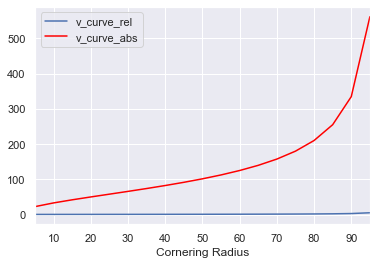

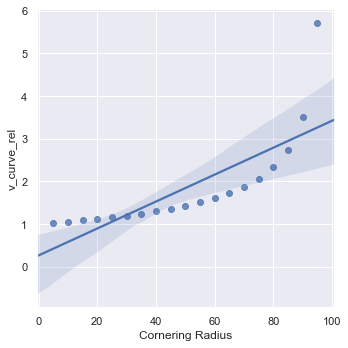

" plot(R, v_curve_rel, 'b')\n    hold on \n    plot(R, v_0Cl_rel, '--r')\n    \n    xlabel('Corner Radius, R [m]')\n    ylabel('Relative Performance')\n    title('Relative Performance in Relation to Curve Radius')\n    legend('Input Cl', 'Cl=0') %Does Cl=0 really mean no downforce?\n    axis tight\n    hold off\n\nplot(R, v_curve_abs, 'b')\n    hold on \n    plot(R, v_0Cl, '--r')\n    \n    xlabel('Corner Radius, R [m]')\n    ylabel('Maximum Absolute Velocity, v [km/h]')\n    title('Maximum Cornering Velocity in Relation to Curve Radius')\n    legend('Input Cl', 'Cl=0') %Does Cl=0 really mean no downforce?\n    axis tight\n\n    %% *Aero Top Speed Plot*\n%% Top Speed over Drag Coefficient, Cd \n% Formell\n% \n% P = (Cd*A*v^3)/1.633\n% \n% Warmup\n% \n% P = %Insert Engine Power in [kW]\n% \n% Cd = %Insert Drag Coefficient in []\n% \n% A = %Insert Frontal Area in [m^2]\n% \n% => v_max = ((P*1.633)/(Cd*A))^(1/3)\n% \n% Assumption: Rolling Resistance has been ignored\n% \n% Function plots 

In [3]:
'''Import local modules and plotting packages'''

import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from v_max import v_max
from v_curve import v_curve

v_abs, v_rel, R = v_curve(250, 0.8, 1, 5)
print(v_rel, v_abs, R)

df = pd.DataFrame({'Cornering Radius': R, 'v_curve_rel': v_rel, 'v_curve_abs': v_abs}, columns=['Cornering Radius','v_curve_rel', 'v_curve_abs'], dtype=float)
print(df)

ax = plt.gca()

df.plot(kind='line',x='Cornering Radius',y='v_curve_rel',ax=ax)
df.plot(kind='line',x='Cornering Radius',y='v_curve_abs', color='red', ax=ax)

plt.show()

sns.lmplot(x='Cornering Radius', y='v_curve_rel', data= df)
plt.show()



''' plot(R, v_curve_rel, 'b')
    hold on 
    plot(R, v_0Cl_rel, '--r')
    
    xlabel('Corner Radius, R [m]')
    ylabel('Relative Performance')
    title('Relative Performance in Relation to Curve Radius')
    legend('Input Cl', 'Cl=0') %Does Cl=0 really mean no downforce?
    axis tight
    hold off

plot(R, v_curve_abs, 'b')
    hold on 
    plot(R, v_0Cl, '--r')
    
    xlabel('Corner Radius, R [m]')
    ylabel('Maximum Absolute Velocity, v [km/h]')
    title('Maximum Cornering Velocity in Relation to Curve Radius')
    legend('Input Cl', 'Cl=0') %Does Cl=0 really mean no downforce?
    axis tight

    %% *Aero Top Speed Plot*
%% Top Speed over Drag Coefficient, Cd 
% Formell
% 
% P = (Cd*A*v^3)/1.633
% 
% Warmup
% 
% P = %Insert Engine Power in [kW]
% 
% Cd = %Insert Drag Coefficient in []
% 
% A = %Insert Frontal Area in [m^2]
% 
% => v_max = ((P*1.633)/(Cd*A))^(1/3)
% 
% Assumption: Rolling Resistance has been ignored
% 
% Function plots Theoretical Topspeed over a predefined range of Drag Coefficient 


function topspeed_plot(P,A)
    % P - Engine Power in [kW]
    % Cd - Drag Coefficient 
    % A - Frontal Area in [m^2]
    % Function plots Theoretical Topspeed over a predefined range of Drag Coefficient 
   Cd = 0:0.001:4 ; %Range of Cd allocating for all (ir)relevancy 
   % P = Engine Power in [kW]
   % A = Frontal Area in [m^2]
   v_max_ms = nthroot(((P*1000*1.633)./(Cd.*A)), 3);
   
   topspeed_plot = v_max_ms * 3.6;
  
   %Plotting topspeed and Cd over the predefined range of Cd
   %TO BE CHECKED: Does the graph make mathematical sense for increasing
   %Cd?? Frage an Louis
   
   plot(Cd, topspeed_plot,'b')
   ylabel('Theoretical Topspeed, v [km/h]')
   xlabel('Drag Coefficient, C^d')
   title('Topspeed Function over C^d')
   ylim([0, 300])

end




%% 
% Anmerkungen: 
% 
% 1)Should topspeed and v_max be combined or dispayed separately as is? Functions 
% based on varying P and A, since I didn't know their values. Was the demand to 
% form function on known P and A? If yes, the function need to be modified to 
% include them as constants as opposed to variables.
% 
% 
% 
% 2) Does the plot make sense mathematically or is there an error there somewhere?
% 
%'''